<a href="https://colab.research.google.com/github/yashg2468/CAIS-_Winter_Project_Yash/blob/main/Yash_Emotion_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
msambare_fer2013_path = kagglehub.dataset_download('msambare/fer2013')

print('Data source import complete.')


In [ ]:

for dirname, _, filenames in os.walk('/kaggle/input/fer2013/train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
for dirname, _, filenames in os.walk('/kaggle/input/fer2013/test'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import datasets

import os

In [ ]:
my_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    #although the images are grayscale, there is a third dimension which we will remove
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
    transforms.Resize((48,48))
])

In [ ]:
train_path = '/kaggle/input/fer2013/train'
test_path = '/kaggle/input/fer2013/test'
train_data = datasets.ImageFolder(root=train_path, transform=my_transform)
test_data = datasets.ImageFolder(root=test_path, transform=my_transform)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1, shuffle=False)

In [ ]:
counts = [0,0,0,0,0,0,0]
j = 0
for i, data in enumerate(train_loader, 0):
    inputs, label = data
    #print(label)
    counts[label[j]] += 1
    j+=1
    if(j==31): j = 0

print(counts)

IndexError: index 29 is out of bounds for dimension 0 with size 5

In [ ]:
print(train_data[11115])

(tensor([[[-0.3412, -0.4980, -0.4902,  ..., -0.1294,  0.4588,  1.0000],
         [-0.3569, -0.5294, -0.4980,  ..., -0.1608,  0.0824,  0.9451],
         [-0.4353, -0.5216, -0.4118,  ..., -0.2235, -0.0902,  0.7333],
         ...,
         [-0.4745, -0.4353, -0.4275,  ..., -0.5216, -0.6157, -0.7961],
         [-0.4588, -0.4588, -0.4510,  ..., -0.4902, -0.5843, -0.8039],
         [-0.5373, -0.4353, -0.4275,  ..., -0.4824, -0.5843, -0.8118]]]), 3)


In [ ]:

import torch.nn as nn
import torch.nn.functional as f

class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN,self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size = 3, padding = 1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size = 3, padding = 1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size = 3, padding = 1)
        self.bn3 = nn.BatchNorm2d(128)
        self.fc1 = nn.Linear(128*6*6, 256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 7)
        self.max_pool = nn.MaxPool2d(2,2)
        self.relu = nn.ReLU()
        #self.dropout = nn.Dropout(0.2)

    def forward(self,x):
        x = f.relu(self.bn1(self.conv1(x)))
        x = self.max_pool(x)
        #x = self.dropout(x)
        x = f.relu(self.bn2(self.conv2(x)))
        x = self.max_pool(x)
        #x = self.dropout(x)
        x = f.relu(self.bn3(self.conv3(x)))
        x = self.max_pool(x)
        #x = self.dropout(x)

        x = x.view(x.size(0),-1)
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = f.relu(self.fc3(x))
        x = self.fc4(x)
        return x



emotion_CNN = MyCNN()


Adding loss function - cross entropy loss + adam as optimizer

In [ ]:
import torch.optim as optim

loss_f = nn.CrossEntropyLoss()
optimizer = optim.Adam(emotion_CNN.parameters(),lr=0.01)

In [ ]:
num_epochs = 25
############### YOUR CODE STARTS HERE ####################

for epoch in range(num_epochs):

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # TODO: forward + backward + optimize
        outputs = emotion_CNN(inputs)
        loss = loss_f(outputs,labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 250:.3f}')
            running_loss = 0.0

################# YOUR CODE ENDS HERE #################
print('Finished Training')

[1,   200] loss: 1.292
[1,   400] loss: 1.201
[1,   600] loss: 1.157
[1,   800] loss: 1.116
[2,   200] loss: 1.073
[2,   400] loss: 1.043
[2,   600] loss: 1.036
[2,   800] loss: 1.015
[3,   200] loss: 0.977
[3,   400] loss: 0.988
[3,   600] loss: 0.964
[3,   800] loss: 0.960
[4,   200] loss: 0.932
[4,   400] loss: 0.929
[4,   600] loss: 0.934
[4,   800] loss: 0.914
[5,   200] loss: 0.891
[5,   400] loss: 0.895
[5,   600] loss: 0.884
[5,   800] loss: 0.890
[6,   200] loss: 0.850
[6,   400] loss: 0.846
[6,   600] loss: 0.856
[6,   800] loss: 0.861
[7,   200] loss: 0.802
[7,   400] loss: 0.828
[7,   600] loss: 0.832
[7,   800] loss: 0.817
[8,   200] loss: 0.784
[8,   400] loss: 0.783
[8,   600] loss: 0.796
[8,   800] loss: 0.770
[9,   200] loss: 0.739
[9,   400] loss: 0.756
[9,   600] loss: 0.768
[9,   800] loss: 0.772
[10,   200] loss: 0.714
[10,   400] loss: 0.726
[10,   600] loss: 0.735
[10,   800] loss: 0.738
[11,   200] loss: 0.683
[11,   400] loss: 0.697
[11,   600] loss: 0.728
[11,

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = emotion_CNN(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test images: {100 * correct // total} %')

Accuracy on the test images: 54 %


In [ ]:
# count predictions for each class as task is multimodal classification
classes =('Angry', 'Disgust', 'Fear','Happy', 'Sad', 'Surprise', 'Neutral')
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = emotion_CNN(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if(label == prediction):
              correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: Angry is 39.5 %
Accuracy for class: Disgust is 31.5 %
Accuracy for class: Fear  is 28.2 %
Accuracy for class: Happy is 79.6 %
Accuracy for class: Sad   is 59.1 %
Accuracy for class: Surprise is 41.5 %
Accuracy for class: Neutral is 60.4 %


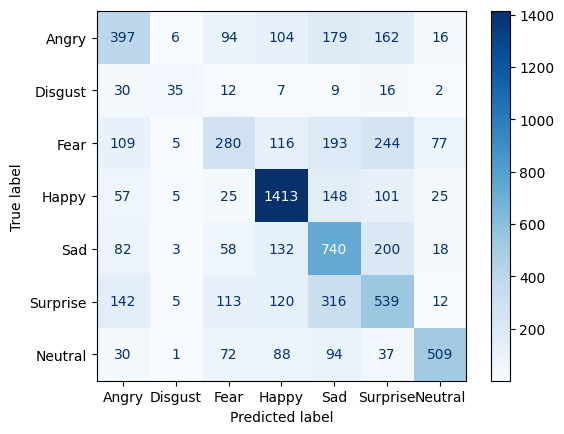

In [ ]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = emotion_CNN(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Angry', 'Disgust', 'Fear','Happy', 'Sad', 'Surprise', 'Neutral'])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()